In [118]:
import pandas as pd
import numpy as np
import seaborn as sns



In [119]:
pg = pd.read_csv(r'C:\Users\User\pinguins2.csv', sep= ';', na_values=['NA', 'NaN', 'null'])

In [120]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


**- Vamos definir os seguintes problemas:**
- 1.Quais pinguins não têm anotações? 
- 2.Quais ilhas a maioria dos pinguins está vindo? 
- 3.Quais as espécies que a ONG mais possui? 
- 4.Existe alguma relação entre as medidas do pinguim e a sua espécie? 
- 5.Existe alguma relação entre as medidas do pinguim e seu sexo para cada uma das três espécies?  

# 1. Quais pinguins não têm anotações? 

In [121]:

pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Espece                344 non-null    object 
 1   Ilha                  344 non-null    object 
 2   largura do bico       342 non-null    float64
 3   profundidade do bico  342 non-null    float64
 4   tamanho_da_asa        342 non-null    float64
 5   massa corporal        342 non-null    float64
 6   sexo                  333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<Axes: ylabel='Count'>

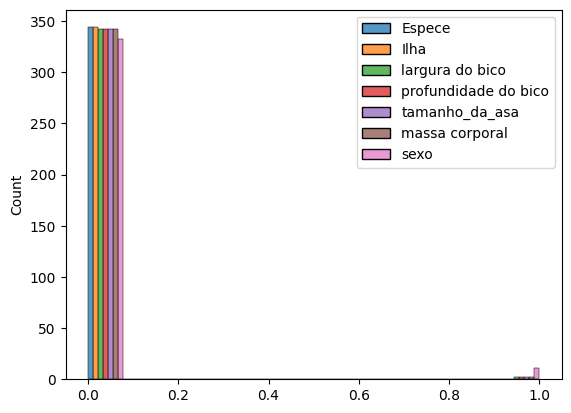

In [122]:
valores_faltantes = pg.isnull()
sns.histplot(valores_faltantes, multiple='dodge')

In [123]:
linhas_com_faltantes = pg[pg.isnull().any(axis=1)]
print(linhas_com_faltantes)

     Espece       Ilha  largura do bico  profundidade do bico  tamanho_da_asa  \
3    Adelie  Torgersen              NaN                   NaN             NaN   
8    Adelie  Torgersen             34.1                  18.1           193.0   
9    Adelie  Torgersen             42.0                  20.2           190.0   
10   Adelie  Torgersen             37.8                  17.1           186.0   
11   Adelie  Torgersen             37.8                  17.3           180.0   
47   Adelie      Dream             37.5                  18.9           179.0   
178  Gentoo     Biscoe             44.5                  14.3           216.0   
218  Gentoo     Biscoe             46.2                  14.4           214.0   
256  Gentoo     Biscoe             47.3                  13.8           216.0   
268  Gentoo     Biscoe             44.5                  15.7           217.0   
271  Gentoo     Biscoe              NaN                   NaN             NaN   

     massa corporal sexo  


A partir do comando `pg.info()`, é revelado que nosso conjunto de dados possui 344 entradas. No entanto, observamos que algumas colunas apresentam valores faltantes:

* **largura do bico**: 2 valores faltantes
* **profundidade do bico**: 2 valores faltantes
* **tamanho da asa**: 2 valores faltantes
* **massa corporal**: 2 valores faltantes
* **sexo**: 11 valores faltantes

Podemos visualizar melhor esses dados ao plotar um gráfico da contagem de valores faltantes. Portanto, os pinguins correspondentes a essas linhas são os que "não têm todas as anotações".
Dessa forma podemos acessar essas linhas específicas com o comando `.any(axis=1)`, onde nos retorna a localização das linhas com valores faltantes em `pg.isnull()`. Por fim, vemos que existem **11 pinguins distintos** sem anotações

# 2. Quais ilhas a maioria dos pinguins está vindo? 

In [124]:
pg.Ilha.value_counts()

Ilha
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

<Axes: xlabel='Ilha', ylabel='count'>

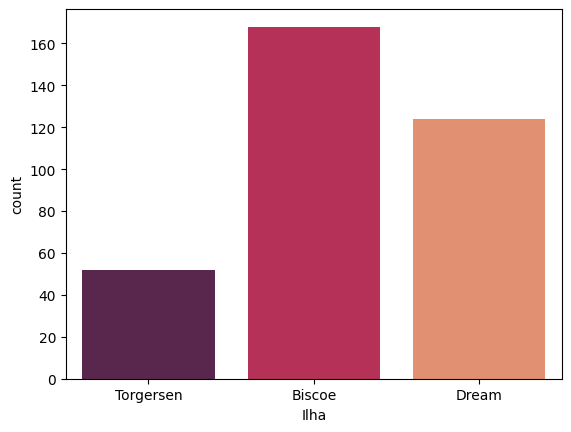

In [125]:
sns.countplot(x='Ilha',hue='Ilha', data=pg, palette='rocket', legend=False)

Primeiro, podemos analisar a contagem de onde cada pinguim vem com `.value_counts()` aplicado sobre a classe ***'Ilha'*** e para efeitos de visualização foi plotado o gráfico da contagem das ilhas onde vemos que a subclasse(ilha) **Torgersen** é a que menos possui representantes, já a subclasse **Biscoe** é a ilha com mais representantes no banco de dados

# 3.Quais as espécies que a ONG mais possui? 

In [126]:
pg.Espece.value_counts()

Espece
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='Espece', ylabel='count'>

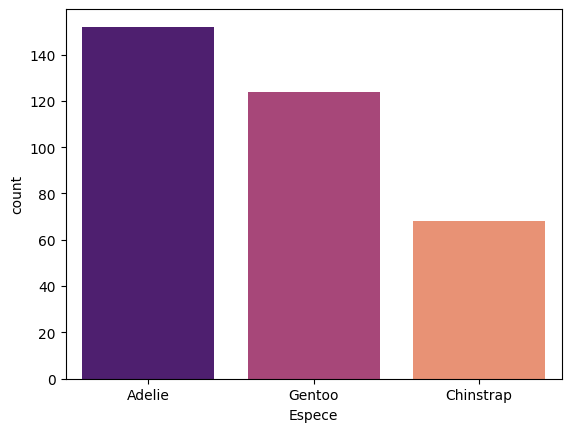

In [127]:
sns.countplot(x='Espece', hue='Espece', data=pg, palette='magma', legend=False)

Novamente podemos realizar o mesmo procedimento anterior. analisar a contagem de cada espécie com `.value_counts()` e para visualização destes dados foi plotado o gráfico da contagem das espécies onde vemos que a subclasse **Chinstrap** é a que menos possui representantes, já a subclasse **Adelie** é a espécie com mais representantes

# 4.Existe alguma relação entre as medidas do pinguim e a sua espécie?

In [128]:
pg.columns

Index(['Espece', 'Ilha', 'largura do bico', 'profundidade do bico',
       'tamanho_da_asa', 'massa corporal', 'sexo'],
      dtype='object')

In [129]:
colunas_numericas = ['largura do bico', 'profundidade do bico', 'tamanho_da_asa', 'massa corporal']

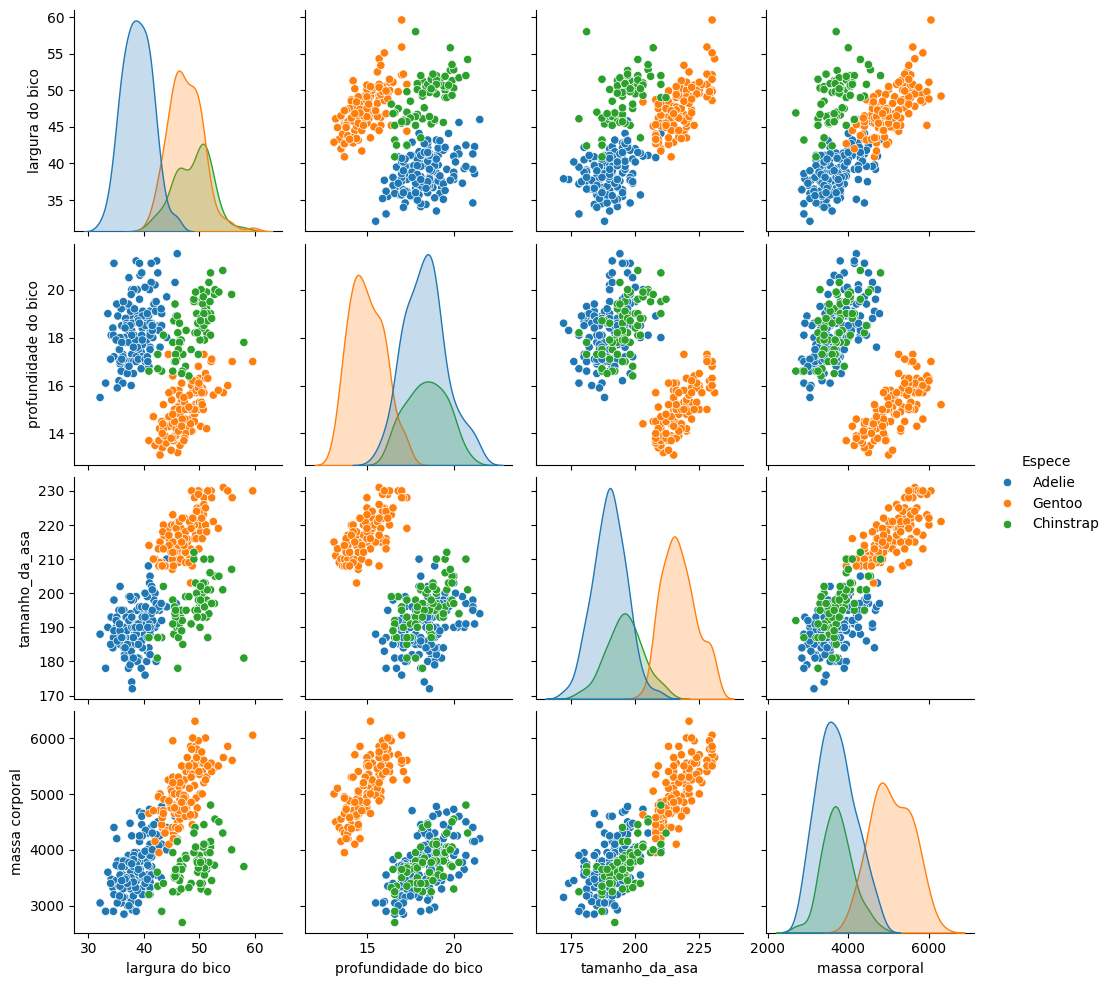

In [130]:
sns.pairplot(pg, hue='Espece')

# 5.Existe alguma relação entre as medidas do pinguim e seu sexo para cada uma das três espécies?

In [131]:
pg['sexo'].isna().value_counts()

sexo
False    333
True      11
Name: count, dtype: int64

In [132]:
pg.dropna(subset=['sexo'], inplace= True)

In [133]:
pg['sexo'].isna().value_counts()

sexo
False    333
Name: count, dtype: int64

In [134]:
pd.get_dummies(pg.sexo)

,female,male
0,False,True
1,True,False
2,True,False
4,True,False
5,False,True
...,...,...
339,False,True
340,True,False
341,False,True
342,False,True


In [135]:
sexo = pd.get_dummies(pg.sexo)

In [136]:
pg[['female', 'male']] = sexo

In [137]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,sexo,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,False,True


In [138]:
pg.drop(['sexo'], axis=1, inplace=True)

In [139]:
pg.head()

,Espece,Ilha,largura do bico,profundidade do bico,tamanho_da_asa,massa corporal,female,male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,False,True


In [140]:
pg.drop(['female'], axis= 1, inplace= True)

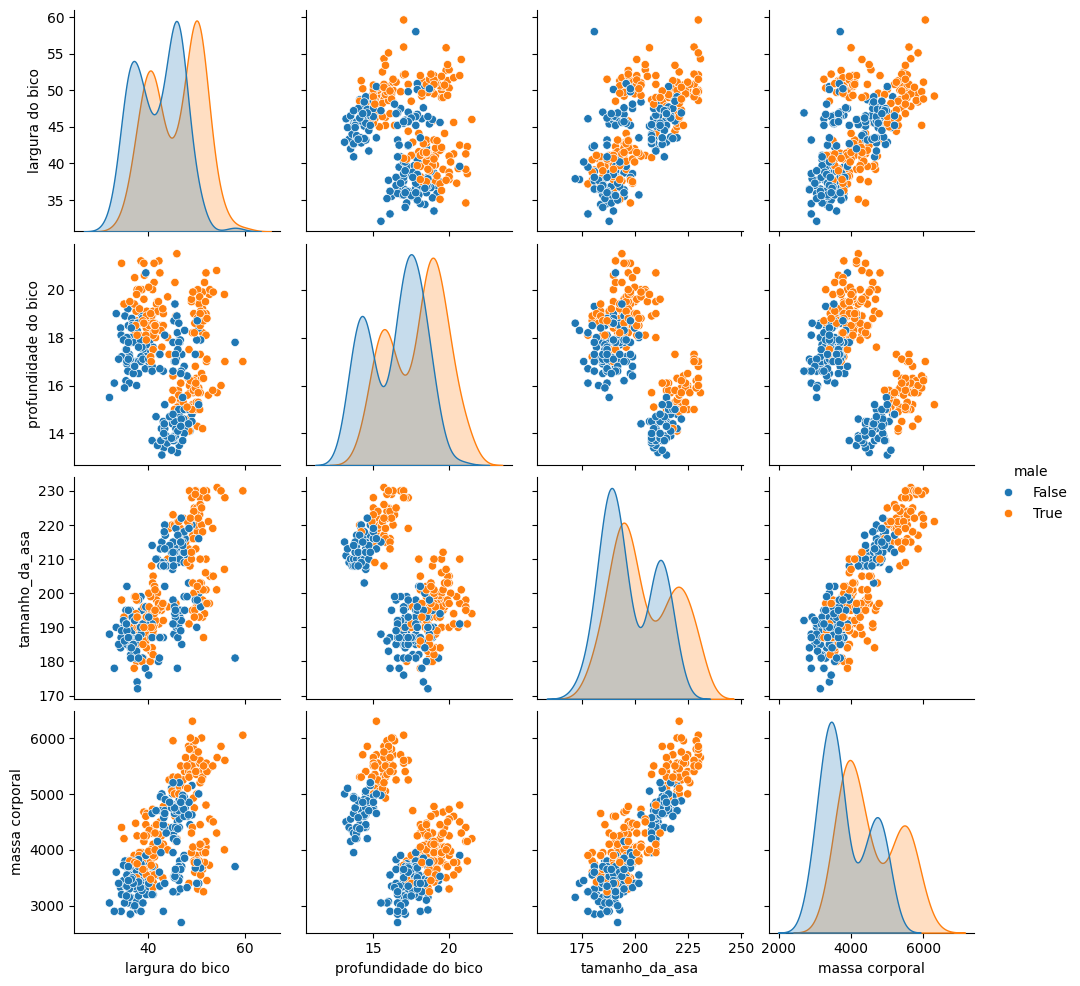

In [141]:
sns.pairplot(pg, hue='male')